# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 5 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.loc'] = 'best'

## Esercizio 05.1: <span style="color:brown"> L'atomo di idrogeno </span>

### Orbitali atomici
Per prima cosa si riportano i grafici delle distribuzioni dei punti ottenuti campionando le distribuzioni di probabilità con l'algoritmo di Metropolis: queste corrispondono agli orbitali atomici $1s$ e $2p_z$ .\
Sono riportati sia casi del campionamento con probabilità di transizione $T(\vec{x}|\vec{y})$ uniforme che normale multivariata.

In [2]:
max_points = 500000 #prevent huge loading
x1, y1, z1 = np.loadtxt("coord_1s.dat", dtype=float, unpack=True, max_rows=max_points)
x1_mv, y1_mv, z1_mv = np.loadtxt("coord_1s_multivar.dat", dtype=float, unpack=True, max_rows=max_points)

x = [x1, x1_mv]
y = [y1, y1_mv]
z = [z1, z1_mv]
labels = ["$1s$ orbital (uniform)", "$1s$ orbital (multivariate)"]

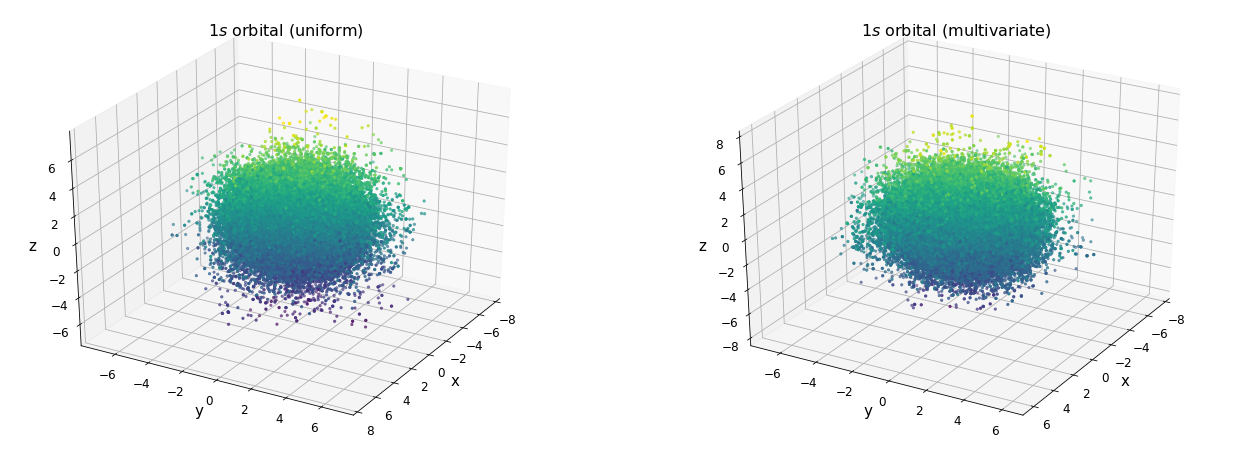

In [4]:
#1s orbital
fig = plt.figure(figsize=(22,8))
for xx, yy, zz, label, i in zip(x, y, z, labels,[1,2]):
    ax = fig.add_subplot(1,2, i, projection='3d')
    ax.scatter(xx, yy, zz, c=zz, marker='.')
    ax.set_title(label, fontsize=16)
    ax.set_xlabel(r'x', size=15)
    ax.set_ylabel(r'y', size=15)
    ax.set_zlabel(r'z', size=15)
    ax.view_init(30, 30)
    ax.grid(True)
plt.show()

In [5]:
#load data and set lists for plots
x2, y2, z2 = np.loadtxt("coord_2p.dat", dtype=float, unpack=True, max_rows=max_points)
x2_mv, y2_mv, z2_mv = np.loadtxt("coord_2p_multivar.dat", dtype=float, unpack=True, max_rows=max_points)

x = [x2, x2_mv]
y = [y2, y2_mv]
z = [z2, z2_mv]
labels = ["$2p_z$ orbital (uniform)", "$2p_z$ orbital (multivariate)"]

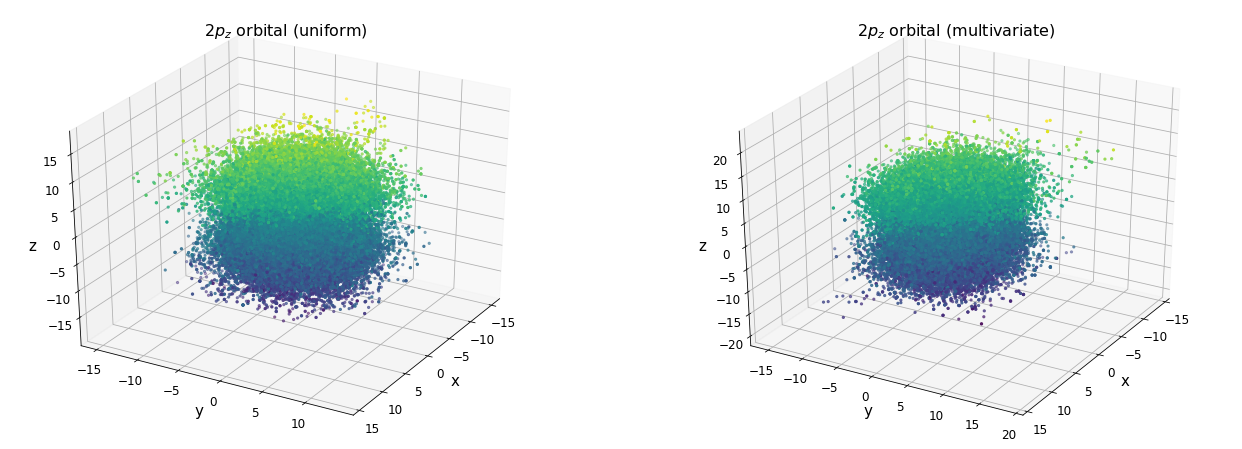

In [6]:
#2pz orbital
fig = plt.figure(figsize=(22,8))
for xx, yy, zz, label, i in zip(x, y, z, labels,[1,2]):
    ax = fig.add_subplot(1,2, i, projection='3d')
    ax.scatter(xx, yy, zz, c=zz, marker='.')
    ax.set_title(label, fontsize=16)
    ax.set_xlabel(r'x', size=15)
    ax.set_ylabel(r'y', size=15)
    ax.set_zlabel(r'z', size=15)
    ax.view_init(30, 30)
    ax.grid(True)
plt.show()

Si vede come i punti campionati con l'algoritmo di Metropolis sono principalmente all'interno degli orbitali atomici.

### Valori di aspettazione del raggio
L'algoritmo di Metropolis permette di campionare la densità di probabilità $|\psi(x,y,z)|^2$ per l'atomo di idrogeno, partendo dalla funzione d'onda e poi di utilizzare i punti campionati per stimare il valor medio della distanza $<\!r\!>$.

Ci si aspetta che i risultati della simulazione siano compatibili con i risultati del calcolo analitico:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
Nell'utilizzare il Metropolis è stato scelto un parametro $\delta$ per ottenere un'accettazione delle mosse proposte di circa il $50\%$, in modo da ottenere un buon compromesso tra efficienza e correlazione.\
Per eseguire le simulazioni sono stati usati $M=10^7$ punti per il campionamento, divisi in $N=100$ blocchi e le simulazioni sono state fatte equilibrare, dato che quando si parte in zone a probabilità molto bassa la catena di Markov si deve prima spostare in zone a probabilità maggiore.\
Tutti i risultati (valori medi ed errori) sono stati calcolati usando il *data blocking* e sono espressi in unita del raggio di Bohr $a_0$.

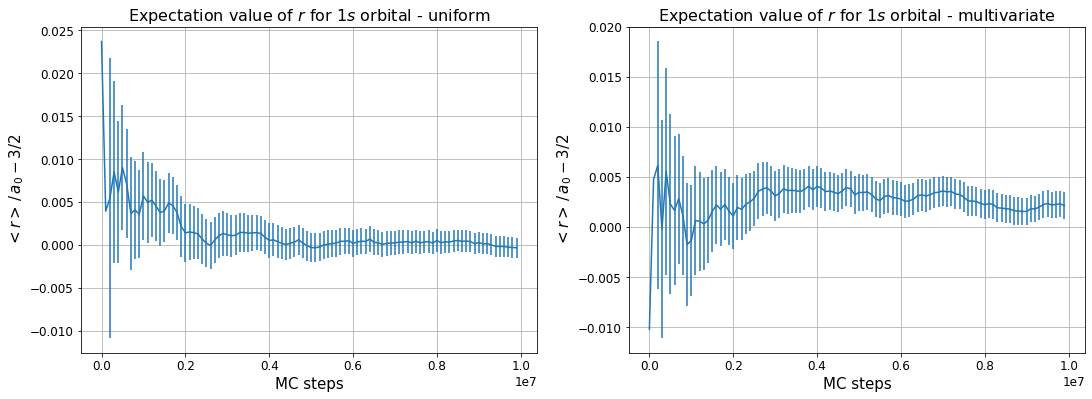

In [7]:
#plots for 1s orbital
nb_u, ave_r_u, err_r_u = np.loadtxt('r_1s.dat', dtype=float, unpack='true')
nb_mvar, ave_r_mvar, err_r_mvar = np.loadtxt('r_1s_multivar.dat', dtype=float, unpack='true')

L = 100000  #number of steps per block
nb_u *= L
nb_mvar *= L

#useful variables for plots
nb_r = [nb_u, nb_mvar]
ave_r = [ave_r_u, ave_r_mvar]
err_r = [err_r_u, err_r_mvar]
titles = ['Expectation value of $r$ for $1s$ orbital - uniform', 
          'Expectation value of $r$ for $1s$ orbital - multivariate']

#make plots
fig, axx = plt.subplots(1, 2, figsize=(18,6))
for ax, nb, ave, err, label in zip(axx, nb_r, ave_r, err_r, titles):
    ax.errorbar(nb, ave - 1.5, yerr=err)
    ax.set_title(label, fontsize=16)
    ax.set_xlabel(f'MC steps', size=15)
    ax.set_ylabel(f'$<r>\,/\,a_0 - 3/2$', size=15)
    ax.grid(True)

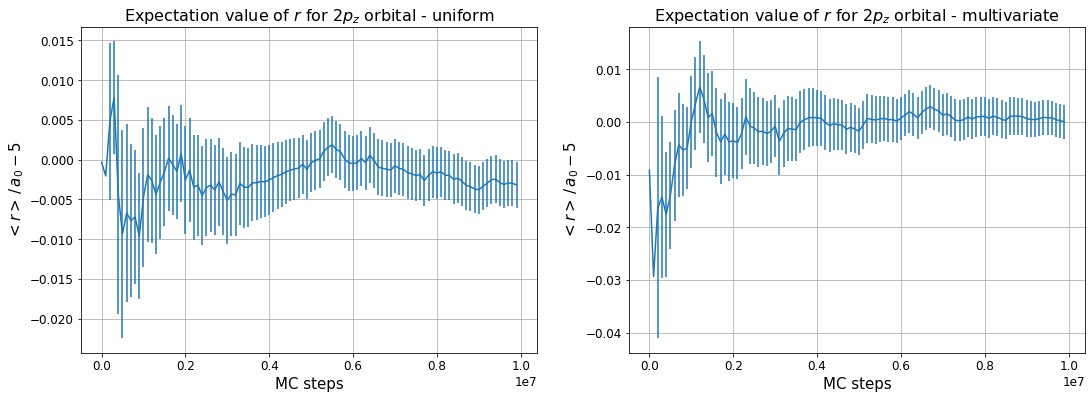

In [8]:
#plots for 2p_z orbital
nb_u, ave_r_u, err_r_u = np.loadtxt('r_2p.dat', dtype=float, unpack='true')
nb_mvar, ave_r_mvar, err_r_mvar = np.loadtxt('r_2p_multivar.dat', dtype=float, unpack='true')

L = 100000  #number of steps per block
nb_u *= L
nb_mvar *= L

#useful variables for plots
nb_r = [nb_u, nb_mvar]
ave_r = [ave_r_u, ave_r_mvar]
err_r = [err_r_u, err_r_mvar]
titles = ['Expectation value of $r$ for $2p_z$ orbital - uniform', 
          'Expectation value of $r$ for $2p_z$ orbital - multivariate']

#make plots
fig, axx = plt.subplots(1, 2, figsize=(18,6))
for ax, nb, ave, err, label in zip(axx, nb_r, ave_r, err_r, titles):
    ax.errorbar(nb, ave - 5., yerr=err)
    ax.set_title(label, fontsize=16)
    ax.set_xlabel(f'MC steps', size=15)
    ax.set_ylabel(f'$<r>\,/\,a_0 - 5$', size=15)
    ax.grid(True)

Si osserva che due delle quantità calcolate sono compatibili con i risultati teorici entro una deviazione standard. Invece le altre due sono di poco al di fuori di una $\sigma$, ma dentro $2\sigma$; questo permette di affermare che sono comunque dei risultati compatibili con le soluzioni analitiche.\
Inoltre si può osservare che utilizzare una matrice di transizione uniforme o normale multivariata non altera la validità del campionamento (come ci si aspettava, dato che sono entrambe probabilità di trasferimento valide).